# Etivity 2: _Data Preparation_
**Student Name**: _Thomas Kiely_

**Student ID**: _17185203_

- 1. Encode all categorical attributes as numerical.
- 2. Fill in all missing values in the dataset.
- 3. Apply scalers to rescale our data.
- 4. Treat outliers using various methods.
- 5. The creation of newly derived features, formed from the current feature set.
- 6. Save the prepared dataset as a CSV file

In [159]:
# Import required packages
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [160]:
# Create pandas dataframe from the bank dataset
df = pd.read_csv('./bank.csv')

In [161]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,32.0,technician,single,tertiary,no,392,yes,no,cellular,1,apr,957,2,131,2,failure,no
1,39.0,technician,divorced,secondary,no,688,yes,yes,cellular,1,apr,233,2,133,1,failure,no
2,59.0,retired,married,secondary,no,1035,yes,yes,cellular,1,apr,126,2,239,1,failure,no
3,47.0,blue-collar,married,secondary,no,398,yes,yes,cellular,1,apr,274,1,238,2,failure,no
4,54.0,retired,married,secondary,no,1004,yes,no,cellular,1,apr,479,1,307,1,failure,no


In [162]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1995,20.0,student,single,NaN,no,2785,no,no,cellular,16,sep,327,2,-1,0,NaN,yes
1996,28.0,admin.,single,secondary,no,127,no,no,cellular,16,sep,1334,2,-1,0,NaN,yes
1997,81.0,retired,married,primary,no,1154,no,no,telephone,17,sep,231,1,-1,0,NaN,yes
1998,46.0,services,married,primary,no,4343,yes,no,NaN,20,sep,185,1,-1,0,NaN,yes
1999,40.0,entrepreneur,married,secondary,no,6403,no,no,cellular,22,sep,208,2,-1,0,NaN,yes


In [163]:
df.isna().sum()

age            12
job            10
marital         0
education     104
default         0
balance         0
housing         0
loan            0
contact       191
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome      454
subscribed      0
dtype: int64

`df.isna().sum()` is used here to display statistics for the categorical attributes in the datatset.\
There are a few inferences we can draw by looking at the output of `df.isnull().sum()`:

- `age` has 12 missing values.
- `job` has 10 missing values.
- `education` has 104 missing values.
- `contact` has 191 missing values.
- `poutcome` has 454 missing values.


In [164]:
missing_val_percent = 100 * df.isna().sum() / len(df)
print(missing_val_percent)

age            0.60
job            0.50
marital        0.00
education      5.20
default        0.00
balance        0.00
housing        0.00
loan           0.00
contact        9.55
day            0.00
month          0.00
duration       0.00
campaign       0.00
pdays          0.00
previous       0.00
poutcome      22.70
subscribed     0.00
dtype: float64


`missing_val_percent` is used here to illustrate the missing value percentages for each data column
- `age` is missing 0.6% of its values
- `job` is missing 0.5% of its values
- `education` is missing 5.2% of its values
- `contact` is missing 9.55% of its values
- `poutcome` is missing 22.70% of its values

Note that no column has more than 25% missing values. Thus, we do not need to consider dropping whole columns.

In [165]:
df_original = df

## 1. Encode all categorical attributes as numerical

In [166]:
# Create a mapper for months of the year

scale_mapper_month = {
    "jan": 1,
    "feb": 2,
    "mar": 3,
    "apr": 4,
    "may": 5,
    "jun": 6,
    "jul": 7,
    "aug": 8,
    "sep": 9,
    "oct": 10,
    "nov": 11,
    "dec": 12
}

df['month'] = df['month'].replace(scale_mapper_month)

df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1995,20.0,student,single,NaN,no,2785,no,no,cellular,16,9,327,2,-1,0,NaN,yes
1996,28.0,admin.,single,secondary,no,127,no,no,cellular,16,9,1334,2,-1,0,NaN,yes
1997,81.0,retired,married,primary,no,1154,no,no,telephone,17,9,231,1,-1,0,NaN,yes
1998,46.0,services,married,primary,no,4343,yes,no,NaN,20,9,185,1,-1,0,NaN,yes
1999,40.0,entrepreneur,married,secondary,no,6403,no,no,cellular,22,9,208,2,-1,0,NaN,yes


### One-Hot Encoding

In [167]:
# first one-hot encode all nominal data columns with NaNs

df = pd.get_dummies(df, columns=['job','education','contact','poutcome'], 
                        dummy_na=True, 
                        drop_first=True)
df.tail()

,age,marital,default,balance,housing,loan,day,month,duration,campaign,...,job_unemployed,job_nan,education_secondary,education_tertiary,education_nan,contact_telephone,contact_nan,poutcome_other,poutcome_success,poutcome_nan
1995,20.0,single,no,2785,no,no,16,9,327,2,...,0,0,0,0,1,0,0,0,0,1
1996,28.0,single,no,127,no,no,16,9,1334,2,...,0,0,1,0,0,0,0,0,0,1
1997,81.0,married,no,1154,no,no,17,9,231,1,...,0,0,0,0,0,1,0,0,0,1
1998,46.0,married,no,4343,yes,no,20,9,185,1,...,0,0,0,0,0,0,1,0,0,1
1999,40.0,married,no,6403,no,no,22,9,208,2,...,0,0,1,0,0,0,0,0,0,1


In [168]:
# Next One-hot encode all other nominal data columns

df = pd.get_dummies(df, drop_first=True)
df.head()

,age,balance,day,month,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,...,contact_nan,poutcome_other,poutcome_success,poutcome_nan,marital_married,marital_single,default_yes,housing_yes,loan_yes,subscribed_yes
0,32.0,392,1,4,957,2,131,2,0,0,...,0,0,0,0,0,1,0,1,0,0
1,39.0,688,1,4,233,2,133,1,0,0,...,0,0,0,0,0,0,0,1,1,0
2,59.0,1035,1,4,126,2,239,1,0,0,...,0,0,0,0,1,0,0,1,1,0
3,47.0,398,1,4,274,1,238,2,1,0,...,0,0,0,0,1,0,0,1,1,0
4,54.0,1004,1,4,479,1,307,1,0,0,...,0,0,0,0,1,0,0,1,0,0


## 2. Fill in all missing values in the dataset

In [169]:
df.isna().sum()

age                    12
balance                 0
day                     0
month                   0
duration                0
campaign                0
pdays                   0
previous                0
job_blue-collar         0
job_entrepreneur        0
job_housemaid           0
job_management          0
job_retired             0
job_self-employed       0
job_services            0
job_student             0
job_technician          0
job_unemployed          0
job_nan                 0
education_secondary     0
education_tertiary      0
education_nan           0
contact_telephone       0
contact_nan             0
poutcome_other          0
poutcome_success        0
poutcome_nan            0
marital_married         0
marital_single          0
default_yes             0
housing_yes             0
loan_yes                0
subscribed_yes          0
dtype: int64

`df.isna().sum()` is used once again to identify any missing values
- `age` has 12 missing values

To fill in the missing values in the `age` column we can hypothesise that `marital_married` and `job_retired` attributes can be used to produce an estimate for the missing age values.

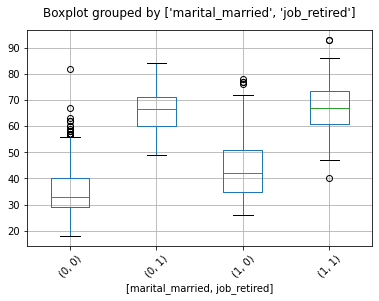

In [170]:
df.boxplot(column='age', by=['marital_married','job_retired'], rot=45)
plt.title("")
plt.show()

In [171]:
ptable = df.pivot_table(values='age', 
                        index='marital_married',
                        columns='job_retired',
                        aggfunc=np.median)
ptable

job_retired,0,1
marital_married,,
0,33.0,66.5
1,42.0,67.0


In [172]:
# Define function to return an element of the pivot table
def get_element(x):
    return ptable.loc[x['marital_married'], x['job_retired']]

In [173]:
# Replace missing age values
df['age'].fillna(df[df['age'].isnull()].apply(get_element, axis=1), inplace=True)

In [174]:
df.isna().sum()

age                    0
balance                0
day                    0
month                  0
duration               0
campaign               0
pdays                  0
previous               0
job_blue-collar        0
job_entrepreneur       0
job_housemaid          0
job_management         0
job_retired            0
job_self-employed      0
job_services           0
job_student            0
job_technician         0
job_unemployed         0
job_nan                0
education_secondary    0
education_tertiary     0
education_nan          0
contact_telephone      0
contact_nan            0
poutcome_other         0
poutcome_success       0
poutcome_nan           0
marital_married        0
marital_single         0
default_yes            0
housing_yes            0
loan_yes               0
subscribed_yes         0
dtype: int64

`df.isna().sum()` is called again here to check for missing values\
No missing values are present in the dataframe anymore

## 3. Apply scalers to rescale our data.

Most of the attribute columns in the dataframe have already been scaled during the encoding step. 
We will now examine the other attributes to find a suitable scaling technique to apply. These remaining attributes are:
- `age`
- `balance`
- `duration`
- `campaign`
- `previous`
- `pdays`

We can plot the distribution of these attributes to identify outliers and whether they need rescaling

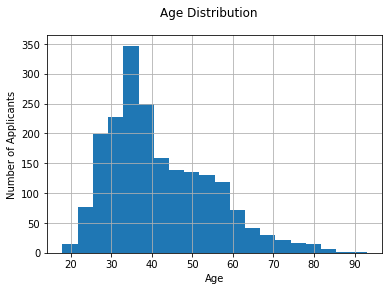

In [175]:
df['age'].hist(bins=20)
plt.suptitle("Age Distribution")
plt.xlabel('Age')
plt.ylabel('Number of Applicants')
plt.show()

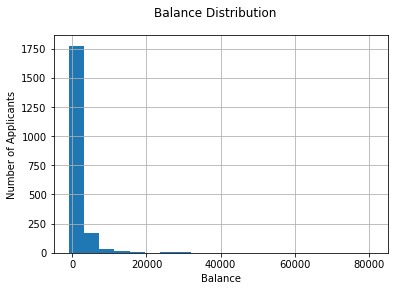

In [176]:
df['balance'].hist(bins=20)
plt.suptitle("Balance Distribution")
plt.xlabel('Balance')
plt.ylabel('Number of Applicants')
plt.show()

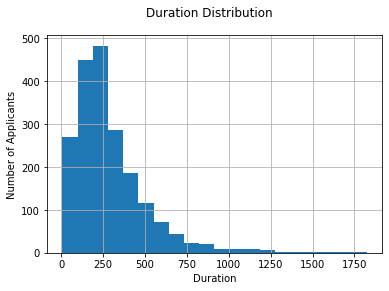

In [177]:
df['duration'].hist(bins=20)
plt.suptitle("Duration Distribution")
plt.xlabel('Duration')
plt.ylabel('Number of Applicants')
plt.show()

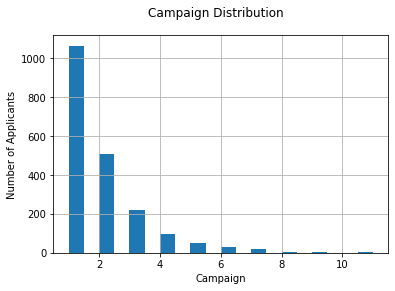

In [178]:
df['campaign'].hist(bins=20)
plt.suptitle("Campaign Distribution")
plt.xlabel('Campaign')
plt.ylabel('Number of Applicants')
plt.show()

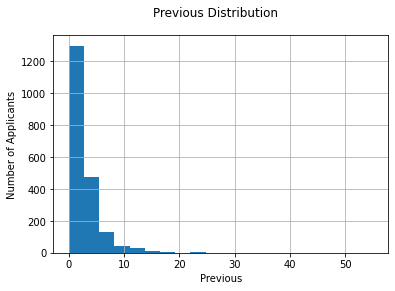

In [179]:
df['previous'].hist(bins=20)
plt.suptitle("Previous Distribution")
plt.xlabel('Previous')
plt.ylabel('Number of Applicants')
plt.show()

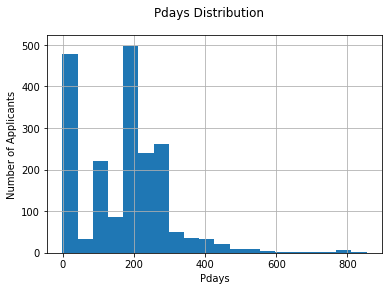

In [180]:
df['pdays'].hist(bins=20)
plt.suptitle("Pdays Distribution")
plt.xlabel('Pdays')
plt.ylabel('Number of Applicants')
plt.show()

From the previous distribution plots, we can see the following
- `balance`
- `previous`
- `pdays`
- `duration`
- 

In [181]:
scaler = StandardScaler()
df[['age', 'duration']] = scaler.fit_transform(df[['age', 'duration']])

In [182]:
robust_scaler = RobustScaler()
df[['balance','previous','pdays', 'campaign']] = robust_scaler.fit_transform(df[['balance','previous','pdays', 'campaign']])

## 4. Treat outliers

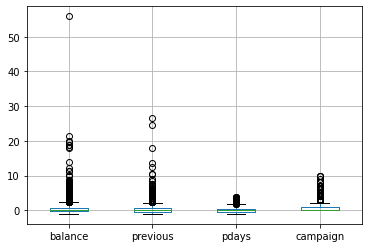

In [183]:
df.boxplot(column=['balance','previous','pdays','campaign'])
plt.show()

From the above plot it is clearly visible that `balance` and `previous` have the most extreme outliers

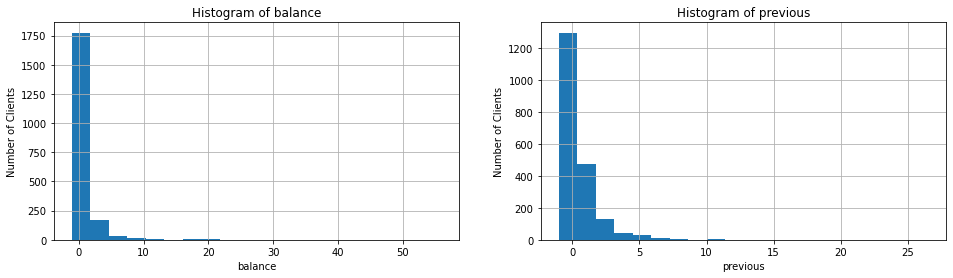

In [184]:
# Create figure with two subplots
fig = plt.figure(figsize=(16,4))

# Plot balance
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("Histogram of balance")
ax1.set_xlabel('balance')
ax1.set_ylabel('Number of Clients')
df['balance'].hist(bins=20)

# Plot previous
ax3 = fig.add_subplot(1, 2, 2)
ax3.set_title("Histogram of previous")
ax3.set_xlabel('previous')
ax3.set_ylabel('Number of Clients')
df['previous'].hist(bins=20)

plt.show()

Both of the above plots are left-skewed which further proves the presense of outliers

In [185]:
df[['balance', 'previous']].min()

balance    -1.060984
previous   -1.000000
dtype: float64

Both the `balance` and `previous` columns contain negative values. We must use a log function to treat these outliers.
Here I are have chosen to shift the values to the interval $[1, +\infty]$ before applying a log transformation.

In [186]:
# Use a log transformation to decrease the impact of outliers
df['balance'] = np.log(df['balance']+2.07)
df['previous'] = np.log(df['previous']+2)

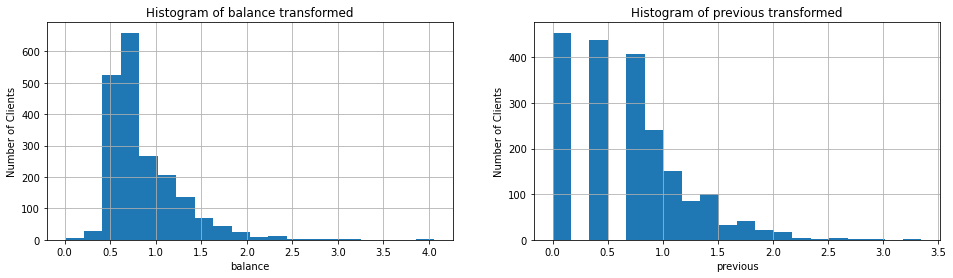

In [187]:
# Create figure with two subplots
fig = plt.figure(figsize=(16,4))

# Plot balance
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("Histogram of balance transformed")
ax1.set_xlabel('balance')
ax1.set_ylabel('Number of Clients')
df['balance'].hist(bins=20)

# Plot previous
ax3 = fig.add_subplot(1, 2, 2)
ax3.set_title("Histogram of previous transformed")
ax3.set_xlabel('previous')
ax3.set_ylabel('Number of Clients')
df['previous'].hist(bins=20)

plt.show()

The transformation process resulted in the above plots which show that `balance` and `previous` now have a more even distribution and are less skewed

## 5. Creation of New Feature

### Cyclical Data Columns

 The monthos and days columns can be considered as cyclic data. I will create the new attributes:
- `Sin_Month`
- `Cos_Month`
- `Sin_Day`
- `Cos_Day`

to better represent the relationships between these data attributes

In [188]:
df['Sin_Month'] = np.sin(2 * np.pi * df['month'] / max(df['month'])) 
df['Cos_Month'] = np.cos(2 * np.pi * df['month'] / max(df['month']))
df['Sin_Day'] = np.sin(2 * np.pi * df['day'] / max(df['day'])) 
df['Cos_Day'] = np.cos(2 * np.pi * df['day'] / max(df['day']))

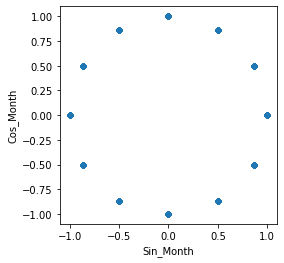

In [189]:
ax = df.plot.scatter('Sin_Month', 'Cos_Month').set_aspect('equal')

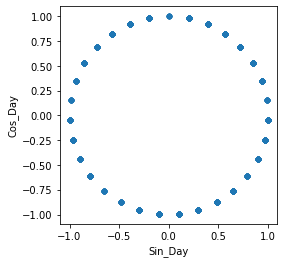

In [190]:
ax = df.plot.scatter('Sin_Day', 'Cos_Day').set_aspect('equal')

In [191]:
df.drop('month', axis=1, inplace=True)
df.drop('day', axis=1, inplace=True)
df.head()

,age,balance,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,marital_married,marital_single,default_yes,housing_yes,loan_yes,subscribed_yes,Sin_Month,Cos_Month,Sin_Day,Cos_Day
0,-0.767545,0.672849,3.002139,1.0,-0.291013,0.693147,0,0,0,0,...,0,1,0,1,0,0,0.866025,-0.5,0.201299,0.97953
1,-0.216431,0.772393,-0.266456,1.0,-0.279601,0.405465,0,0,0,0,...,0,0,0,1,1,0,0.866025,-0.5,0.201299,0.97953
2,1.358182,0.877721,-0.749522,1.0,0.325250,0.405465,0,0,0,0,...,1,0,0,1,1,0,0.866025,-0.5,0.201299,0.97953
3,0.413415,0.674968,-0.081356,0.0,0.319544,0.693147,1,0,0,0,...,1,0,0,1,1,0,0.866025,-0.5,0.201299,0.97953
4,0.964529,0.868750,0.844144,0.0,0.713267,0.405465,0,0,0,0,...,1,0,0,1,0,0,0.866025,-0.5,0.201299,0.97953


### Total_Contact Feature
This feature combines the contact for the current campaign and previous campaigns for each client

This feature has been chosen as the `previous` attribute contains a lot of zeros. They skew this feature towards 0 and cannot be easily fixed with a log transformation

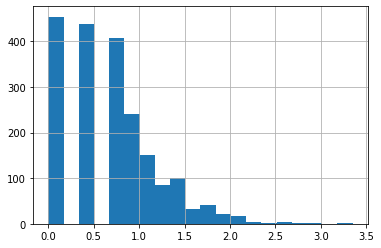

In [192]:
df['previous'].hist(bins=20)
plt.show()

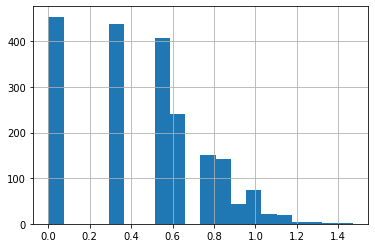

In [193]:
np.log(df['previous']+1).hist(bins=20)
plt.show()

What we can do in this case instead is:
* Create a new feature `Total_Contact` as the sum of the *original* `previous` and `campaign`
* Drop column `previous` because it can be derived from `Total_Contact` and `campaign`.

In [194]:
df['Total_Contact'] = df_original['previous'] + df_original['campaign']
df[['Total_Contact']] = robust_scaler.fit_transform(df[['Total_Contact']])

In [195]:
df['Total_Contact'].min()

-0.6666666666666666

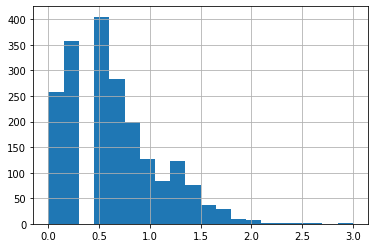

In [196]:
df['Total_Contact'] = np.log(df['Total_Contact'] + 1.67)
df['Total_Contact'].hist(bins=20)
plt.show()

In [197]:
df.drop('previous', axis=1, inplace=True)
df.head()

,age,balance,duration,campaign,pdays,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,marital_single,default_yes,housing_yes,loan_yes,subscribed_yes,Sin_Month,Cos_Month,Sin_Day,Cos_Day,Total_Contact
0,-0.767545,0.672849,3.002139,1.0,-0.291013,0,0,0,0,0,...,1,0,1,0,0,0.866025,-0.5,0.201299,0.97953,0.694812
1,-0.216431,0.772393,-0.266456,1.0,-0.279601,0,0,0,0,0,...,0,0,1,1,0,0.866025,-0.5,0.201299,0.97953,0.512824
2,1.358182,0.877721,-0.749522,1.0,0.325250,0,0,0,0,1,...,0,0,1,1,0,0.866025,-0.5,0.201299,0.97953,0.512824
3,0.413415,0.674968,-0.081356,0.0,0.319544,1,0,0,0,0,...,0,0,1,1,0,0.866025,-0.5,0.201299,0.97953,0.512824
4,0.964529,0.868750,0.844144,0.0,0.713267,0,0,0,0,1,...,0,0,1,0,0,0.866025,-0.5,0.201299,0.97953,0.290179


## 6. Save the Prepared Dataset

In [124]:
df.to_csv('bank_prepared.csv')